In [148]:
import scipy.io as sio

# load data from the .mat file:
# mat_contents = sio.loadmat('EEG_big.mat') # (EEG_data.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/EEG_big4CNN.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/EEG_big4CNN_1subj.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/KOS_100Hz_noICA->0.5-38Hz,Env=1.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->0.5-38Hz,Env=1.mat')

# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/KOS_100Hz_ICA->0.5-38Hz,Env=1.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->1-48Hz,Env=1.mat')

# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_0101T_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_0202T_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_0403T_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_0503T_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_0801T_TD.mat')

# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/ks.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/ks_FD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/ks_2TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/ksenia2_long_chunked.mat') 


# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_FD_fullspectrum.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_FD_lowspectrum.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/KOS_100Hz_ICA->1-38Hz,Env=1_FD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->1-100Hz,Env=1_FD')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->1-47Hz,Env=1_FD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->15-47Hz,Env=1_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->15-47Hz,Env=1_TD5_64_.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->2-30Hz,Env=1_TD5_64_.mat')

# mat_contents = sio.loadmat(
#     '/home/amplifier/home/DATASETS/Merged456->2-30Hz,Env=1_TD1_94_.mat')
# mat_contents = sio.loadmat(
#     '/home/amplifier/home/DATASETS/Merged456->2-30Hz,Env=1_TD101_192_.mat')
# mat_contents = sio.loadmat(
#     '/home/amplifier/home/DATASETS/Merged456->2-30Hz,Env=1_TD197_289_.mat')

file = 'Merged456-197-289_ICA(-eyes)+AUDpreproc.mat, DS2=64Hz, FIR=2-30Hz, centnorm=1, step=2, win=2, TD, 1-93.mat' #0.80(EEGnet.v2)
mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/' + file)


BATCH_SIZE = 20
SHUFFLE = False
TEST_TRAIN = 0.25

KERNEL_SIZE = (32, (10,10), (5,5), (3,3), (2,2))

N_KERNELS = (128,20,40,80,120)
POOL_SIZE = (1,(2,2),(2,2),(2,2),(2,2))

DROPOUT = (0.1, 0.2, 0.3, 0.4, 0.8, 0.8)
DENSE_LEN = 20

In [149]:
# get the Dataset:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = mat_contents['X']
Y = mat_contents['Z']
    

if Y.shape[1] > Y.shape[0]:
    Y = Y.T
    
print('Original data shape:', X.shape)
print('Original labels shape:', Y.shape)

# verify that the model REALLY finds a mapping between the input and the labels. If we get
# our accuracy by chance, then we should get the same accuracy on a permuted dataset:
# Y = np.random.permutation(Y)


# winsize = mat_contents['winsize']
# stepsize = mat_contents['stepsize']
# trial_len = mat_contents['trial_len']
# low_cutoff = mat_contents['low_cutoff']
# high_cutoff = mat_contents['high_cutoff']
# source = mat_contents['filein']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_TRAIN, shuffle=SHUFFLE)
print('Original data type:', x_train.dtype)

# convert to float64 for numerical stability:
x_train = x_train.astype('float64')
y_train = y_train.astype('float64')
x_test = x_test.astype('float64')
y_test = y_test.astype('float64')

# normalize to unit variance and zero mean:
# for i in range(x_train.shape[0]):
#     for j in range(x_train.shape[1]):
#         x_train[i,j,:] = preprocessing.scale(x_train[i,j,:])
# #         x_train[i,j,:] = preprocessing.MaxAbsScaler(x_train[i,j,:])

# for i in range(x_test.shape[0]):
#     for j in range(x_test.shape[1]):
#         x_test[i,j,:] = preprocessing.scale(x_test[i,j,:])
# #         x_test[i,j,:] = preprocessing.minmax_scale(x_test[i,j,:])

# ensure the tensors are sized right:
if len(X.shape)==3:
    x_train = np.expand_dims(x_train,3)
    x_test = np.expand_dims(x_test,3)
    

# one hot encode the labels:
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
y_train = onehot_encoder.fit_transform(y_train)
y_test = onehot_encoder.fit_transform(y_test)

# convert to float16 to save space:
x_train = x_train.astype('float16')
y_train = y_train.astype('float16')
x_test = x_test.astype('float16')
y_test = y_test.astype('float16')
print('Normalized data type:', x_train.dtype)

chan = X.shape[1] # if you work in the FD, this is the height of the sample time-frequency image, othewise EEG channels
leng = X.shape[2] # if you work in the FD, this is the width of the sample time-frequency image, othewise time samples of EEG signal

if len(X.shape)==3:
    streams = 1 # this is EEG channels if you work with frequency domain, in the TD streams = 1
if len(X.shape)==4:
    streams = X.shape[3] # this is EEG channels if you work with frequency domain, in the TD streams = 1


print('test input shape', x_test.shape, "Nomralized MEAN:", np.mean(x_test), "min", np.min(x_test),"max", np.max(x_test))
print('train input shape', x_train.shape, "Nomralized MEAN:", np.mean(x_train), "min", np.min(x_train),"max", np.max(x_train))

print('test labels shape', y_test.shape, "Nomralized MEAN:", np.mean(y_test), "min", np.min(y_test),"max", np.max(y_test))
print('train labels shape', y_train.shape, "Nomralized MEAN:", np.mean(y_train), "min", np.min(y_train),"max", np.max(y_train))

# print('Window length', winsize)
# print('Step size:', stepsize)
# print('Trial length:', trial_len)

Original data shape: (450, 60, 128)
Original labels shape: (450, 1)
Original data type: float32
Normalized data type: float16
test input shape (113, 60, 128, 1) Nomralized MEAN: -2.7537e-05 min -4.8164 max 5.6602
train input shape (337, 60, 128, 1) Nomralized MEAN: -1.2517e-05 min -16.141 max 19.109
test labels shape (113, 2) Nomralized MEAN: 0.5 min 0.0 max 1.0
train labels shape (337, 2) Nomralized MEAN: 0.5 min 0.0 max 1.0


In [160]:
# we first define the autoencoder's architecture:

# make sure you don't hog all the video memory
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
from keras import backend as K
K.set_session(sess)
###################################

from keras.layers import Input, Dense, SeparableConv2D, SeparableConv1D, Conv2D, Conv1D, MaxPooling2D, MaxPooling1D
from keras.layers import Dropout, BatchNormalization, Flatten, ELU, Permute, Reshape, Lambda, Activation
from keras.models import Model
from keras.models import load_model
from keras.callbacks import TensorBoard, EarlyStopping
from keras import optimizers
from keras.initializers import Orthogonal as orth

import numpy as np
import matplotlib.pyplot as plt

def expand_d(x):
    return K.expand_dims(x, -1)

def conv_net(leng):
    
    # input layer
    input_img = Input(shape=(chan, leng, streams))  # adapt this if using `channels_first` image
    
    # Layer 1
    Layer1 = Permute((3,2,1))(input_img)
    Layer1 = Reshape((leng, chan))(Layer1)
    Layer1 = BatchNormalization()(Layer1)

    Layer1 = SeparableConv1D(N_KERNELS[0], KERNEL_SIZE[0], padding='same', depth_multiplier=2,
                kernel_initializer = orth(gain=1.0, seed=None), dilation_rate=2)(Layer1)
    Layer1 = Activation('elu')(Layer1)
    Layer1 = MaxPooling1D(POOL_SIZE[0], padding='same')(Layer1)
    Layer1 = Permute((2,1))(Layer1)
    Layer1 = Lambda(expand_d)(Layer1)

    # Layer 2
    Layer2 = BatchNormalization()(Layer1)
    Layer2 = Dropout(DROPOUT[0])(Layer2)
    Layer2 = SeparableConv2D(N_KERNELS[1], KERNEL_SIZE[1], padding='same',
                kernel_initializer = orth(gain=1.0, seed=None), dilation_rate=2)(Layer2)
    Layer2 = Activation('elu')(Layer2)
    Layer2 = MaxPooling2D(POOL_SIZE[1], padding='same')(Layer2)
    
    # Layer 3
    Layer3 = BatchNormalization()(Layer2)
    Layer3 = Dropout(DROPOUT[1])(Layer3)
    Layer3 = SeparableConv2D(N_KERNELS[2], KERNEL_SIZE[2], padding='same',
                kernel_initializer = orth(gain=1.0, seed=None), dilation_rate=2)(Layer3)
    Layer3 = Activation('elu')(Layer3)
    Layer3 = MaxPooling2D(POOL_SIZE[2], padding='same')(Layer3)
    
    # Layer 4
    Layer4 = BatchNormalization()(Layer3)
    Layer4 = Dropout(DROPOUT[2])(Layer4)
    Layer4 = SeparableConv2D(N_KERNELS[3], KERNEL_SIZE[3], padding='same',
                kernel_initializer = orth(gain=1.0, seed=None), dilation_rate=2)(Layer4)
    Layer4 = Activation('elu')(Layer4)
    Layer4 = MaxPooling2D(POOL_SIZE[3], padding='same')(Layer4)
    
#     # Layer 5
#     Layer5 = BatchNormalization()(Layer4)
#     Layer5 = Dropout(DROPOUT[3])(Layer5)
#     Layer5 = SeparableConv2D(N_KERNELS[4], KERNEL_SIZE[4], padding='same',
#                  kernel_initializer = orth(gain=1.0, seed=None))(Layer5)
#     Layer5 = Activation('elu')(Layer5)
#     Layer5 = MaxPooling2D(POOL_SIZE[4], padding='same')(Layer5)
    
    # Layer 6
    Layer6 = Flatten()(Layer4)
    Layer6 = BatchNormalization()(Layer6)
    Layer6 = Dropout(DROPOUT[4])(Layer6)
    Layer6 = Dense(DENSE_LEN, activation='elu',
                kernel_initializer = orth(gain=1.0, seed=None))(Layer6)

    # Layer 7
    Layer7 = BatchNormalization()(Layer6)
    Layer7 = Dropout(DROPOUT[5])(Layer7)
    Layer7 = Dense(2, activation='softmax')(Layer7)

    return Model(input_img, Layer7)

In [161]:
# define input to the model:
x = Input(shape=(chan, leng, streams))

# make the model:
model = conv_net(leng)

# compile the model:
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.95, nesterov=True)
# model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# model.compile(optimizer='rmsprop', loss=correlation_coefficient_loss)
model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])


# SEE INSIDE THE MODEL:
# conv_net().summary() #or
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_58 (InputLayer)        (None, 60, 128, 1)        0         
_________________________________________________________________
permute_54 (Permute)         (None, 1, 128, 60)        0         
_________________________________________________________________
reshape_29 (Reshape)         (None, 128, 60)           0         
_________________________________________________________________
batch_normalization_162 (Bat (None, 128, 60)           240       
_________________________________________________________________
separable_conv1d_27 (Separab (None, 128, 128)          19328     
_________________________________________________________________
activation_45 (Activation)   (None, 128, 128)          0         
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 128, 128)          0         
__________

In [162]:
# Training time!
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=100, mode='min')
checkpointer = ModelCheckpoint(filepath='/home/amplifier/home/NEW_DL/weights/EEGnet_weights_vert_3.h5',
                               verbose=1,
                               monitor='val_acc',
                               save_best_only=True)
TB = TensorBoard(log_dir='/home/amplifier/home/CNN_stim')

train_history = model.fit(x_train, y_train,
                epochs=1000,
                batch_size=BATCH_SIZE,
                verbose=2,
                shuffle=True,
                validation_data=(x_test, y_test),
                callbacks=[TB, checkpointer, early_stopping])

# model.save('/home/amplifier/home/NEW_DL/models/EEGnet.h5')

Train on 337 samples, validate on 113 samples
Epoch 1/1000
 - 4s - loss: 1.7742 - acc: 0.4599 - val_loss: 0.6813 - val_acc: 0.5841

Epoch 00001: val_acc improved from -inf to 0.58407, saving model to /home/amplifier/home/NEW_DL/weights/EEGnet_weights_vert_3.h5
Epoch 2/1000
 - 1s - loss: 1.2840 - acc: 0.5816 - val_loss: 0.8026 - val_acc: 0.4867

Epoch 00002: val_acc did not improve
Epoch 3/1000
 - 1s - loss: 1.3669 - acc: 0.5519 - val_loss: 1.0161 - val_acc: 0.4425

Epoch 00003: val_acc did not improve
Epoch 4/1000
 - 1s - loss: 1.1800 - acc: 0.5460 - val_loss: 0.7410 - val_acc: 0.4513

Epoch 00004: val_acc did not improve
Epoch 5/1000
 - 1s - loss: 1.4191 - acc: 0.5312 - val_loss: 0.7087 - val_acc: 0.5487

Epoch 00005: val_acc did not improve
Epoch 6/1000
 - 1s - loss: 1.1450 - acc: 0.5401 - val_loss: 0.6876 - val_acc: 0.5487

Epoch 00006: val_acc did not improve
Epoch 7/1000
 - 1s - loss: 1.2580 - acc: 0.5371 - val_loss: 0.6888 - val_acc: 0.5487

Epoch 00007: val_acc did not improve
E


Epoch 00064: val_acc did not improve
Epoch 65/1000
 - 1s - loss: 0.1856 - acc: 0.9199 - val_loss: 1.3987 - val_acc: 0.5575

Epoch 00065: val_acc did not improve
Epoch 66/1000
 - 1s - loss: 0.1878 - acc: 0.9318 - val_loss: 1.4404 - val_acc: 0.5752

Epoch 00066: val_acc did not improve
Epoch 67/1000
 - 1s - loss: 0.2428 - acc: 0.8872 - val_loss: 1.3838 - val_acc: 0.5575

Epoch 00067: val_acc did not improve
Epoch 68/1000
 - 1s - loss: 0.2334 - acc: 0.9050 - val_loss: 1.4746 - val_acc: 0.5487

Epoch 00068: val_acc did not improve
Epoch 69/1000
 - 1s - loss: 0.1620 - acc: 0.9496 - val_loss: 1.5485 - val_acc: 0.5664

Epoch 00069: val_acc did not improve
Epoch 70/1000
 - 1s - loss: 0.1909 - acc: 0.9436 - val_loss: 1.5312 - val_acc: 0.5841

Epoch 00070: val_acc did not improve
Epoch 71/1000
 - 1s - loss: 0.1481 - acc: 0.9407 - val_loss: 1.4716 - val_acc: 0.5664

Epoch 00071: val_acc did not improve
Epoch 72/1000
 - 1s - loss: 0.1959 - acc: 0.9199 - val_loss: 1.7348 - val_acc: 0.5752

Epoch 0

In [163]:
# load the best model:
model.load_weights('/home/amplifier/home/NEW_DL/weights/EEGnet_weights_vert_3.h5')

# let's predict a TRAINING sammple:
decoded_train = model.predict(x_train)
decoded_test = model.predict(x_test)
print(decoded_train.shape)
print(decoded_test.shape)

(337, 2)
(113, 2)


[[43 17]
 [26 27]]


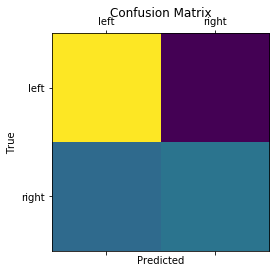

In [164]:
W = []
GT = []

for i in range(len(decoded_test)):
    if decoded_test[i][0]<decoded_test[i][1]:
        W.append('right')
    if decoded_test[i][0]>decoded_test[i][1]:
        W.append('left')

    if y_test[i][0]<y_test[i][1]:
        GT.append('right')
    if y_test[i][0]>y_test[i][1]:
        GT.append('left')
        
from sklearn.metrics import confusion_matrix
labels = ['left', 'right'] # 1 for right, 0 for left
cm = confusion_matrix(GT, W, labels)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.matshow(cm)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
print(cm)

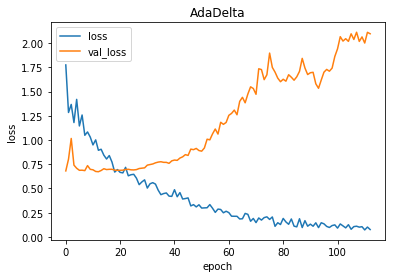

In [165]:
#####################################################

# print(np.array(history.losses))
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.title('AdaDelta')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [166]:
##########################################################

# now test sample by sample
cor_test = []
L = x_test.shape
for sample_no in range(x_test.shape[0]):
    pred = model.predict(np.expand_dims(x_test[sample_no],0))
    if ((pred[0][0]<pred[0][1]) and (y_test[sample_no,0] < y_test[sample_no,1]) or
       ((pred[0][0]>pred[0][1]) & (y_test[sample_no,0] > y_test[sample_no,1]))):
        cor_test.append(1)
    else:
        cor_test.append(0)

cor_train = []
L = x_train.shape
for sample_no in range(x_train.shape[0]):
    pred = model.predict(np.expand_dims(x_train[sample_no],0))
    if ((pred[0][0]<pred[0][1]) and (y_train[sample_no,0] < y_train[sample_no,1]) or
       ((pred[0][0]>pred[0][1]) & (y_train[sample_no,0] > y_train[sample_no,1]))):
        cor_train.append(1)
    else:
        cor_train.append(0)

# Report accuracies
print('Accuracy on the test data:', np.mean(cor_test))
print('Accuracy on the training data:', np.mean(cor_train))

Accuracy on the test data: 0.619469026549
Accuracy on the training data: 1.0


In [68]:
# import csv   
# fields=['VERT2', 'MY04', np.mean(cor_test), np.mean(cor_train)]
# with open(r'/home/amplifier/home/NEW_DL/weights/document.csv', 'a') as f:
#     writer = csv.writer(f)
#     writer.writerow(fields)

In [68]:
# import csv   
# fields=['VERT2', 'MY04', np.mean(cor_test), np.mean(cor_train)]
# with open(r'/home/amplifier/home/NEW_DL/weights/document.csv', 'a') as f:
#     writer = csv.writer(f)
#     writer.writerow(fields)

In [365]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [157]:
from functools import reduce

def factors(n):    
    return set(reduce(list.__add__, 
                ([i, n//i] for i in range(1, int(pow(n, 0.5) + 1)) if n % i == 0)))

def sqfac(input):
    xx = list(factors(input))
    xx.sort()
    ind = []
    ind1 = int(len(xx)/2)-1
    ind.append(xx[ind1])
    ind.append(xx[ind1+1])
    ind.sort(reverse=True)
    return ind

Layer number: 4 Layer name: separable_conv1d_26
(32, 60, 2)
(32, 60, 2)


IndexError: index 120 is out of bounds for axis 1 with size 120

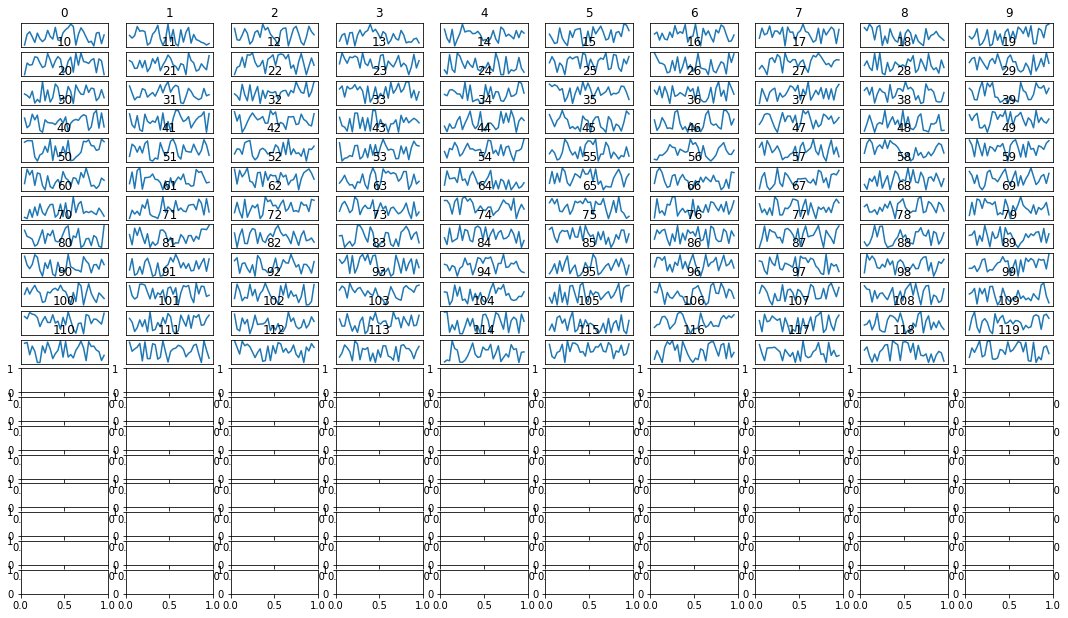

In [158]:
# Visualize a few kernels from the first convolutional layer:
# enc.layers[2].get_config()
# dir(enc.layers[2])
layer_no = 4
how_many_kernels_to_visualize = 200
x = model.layers[layer_no].get_weights()
print ('Layer number:', layer_no, 'Layer name:', model.layers[layer_no].name)

sh = x[0].shape
print(sh)
ker = x[0].reshape(sh[0], sh[1]*sh[2])
print(x[0].shape) # kernel length x input channels x output channels

ind = sqfac(how_many_kernels_to_visualize)
I = ind[0]
J = ind[1]
c = 0
fig, axs = plt.subplots(I,J)
fig.set_size_inches(18.5, 10.5)
axs = axs.ravel()
for i in range(I):
    for j in range(J):
        axs[c].plot(ker[:,c])
        axs[c].get_xaxis().set_visible(False)
        axs[c].get_yaxis().set_visible(False)        
        axs[c].set_title(str(c))
        c = c + 1
plt.suptitle('Convolution kernels in layer ' + model.layers[layer_no].name, fontsize=26)

Layer number: 4 Layer name: separable_conv1d_26
(32, 60, 2)
ker.shape =  (32, 120)
I 20 
J 10


ValueError: cannot reshape array of size 32 into shape (100,1)

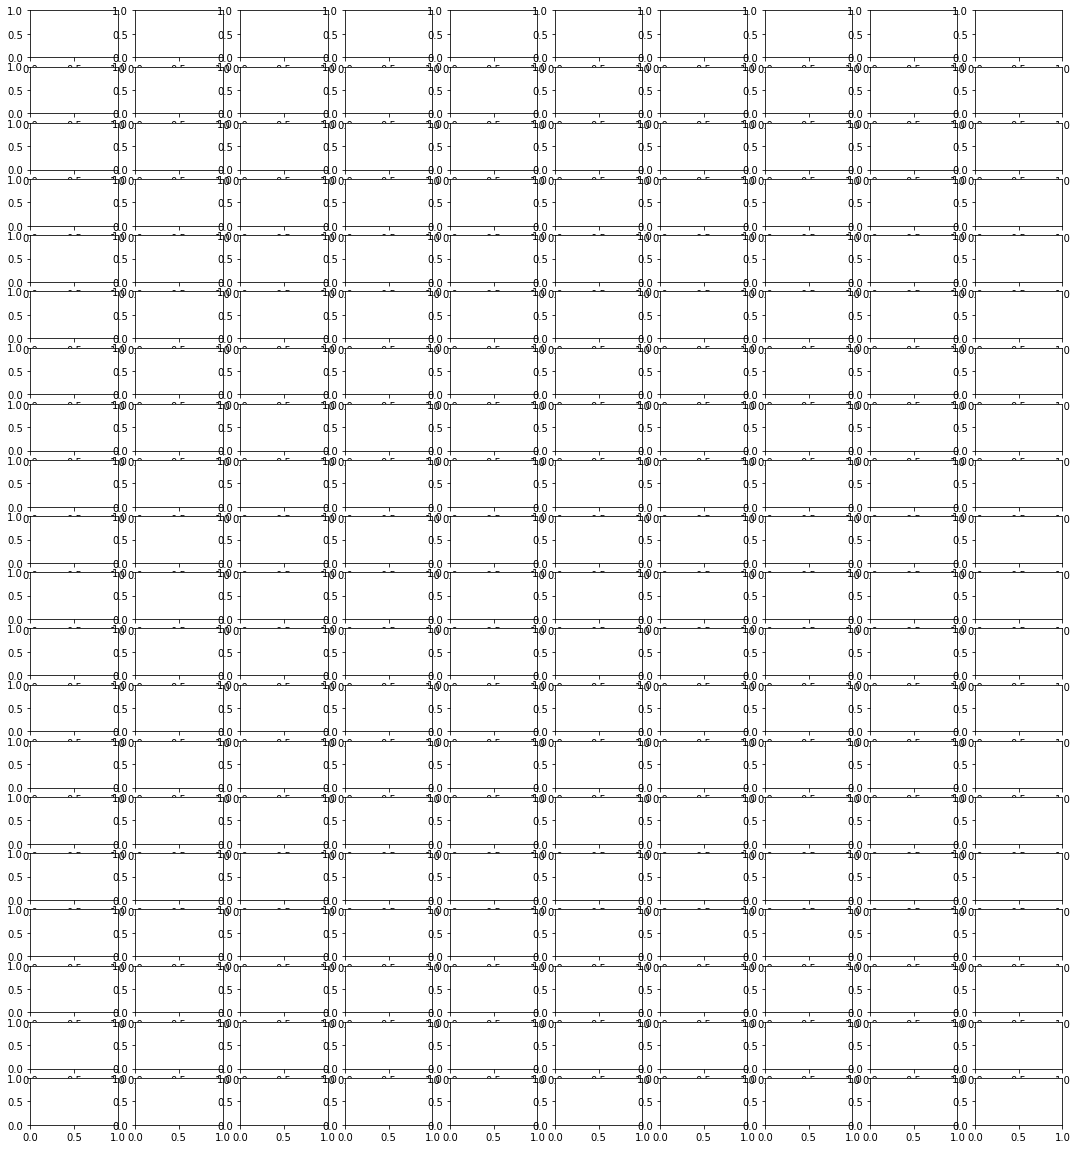

In [159]:
import scipy.fftpack

layer_no = 4
how_many_kernels_to_visualize = 200
x = model.layers[layer_no].get_weights()
print ('Layer number:', layer_no, 'Layer name:', model.layers[layer_no].name)

sh = x[0].shape
print(sh)
ker = x[0].reshape(sh[0], sh[1]*sh[2])
print('ker.shape = ', ker.shape) # kernel length x input channels x output channels

ind = sqfac(how_many_kernels_to_visualize)
I = ind[0]
J = ind[1]

print('I', I, '\nJ', J)
c = 0

fs = 250
T = 1/fs * x[0].shape[0]
f = 50
t = np.arange(0,T, 1/fs)

fig, axs = plt.subplots(I,J)
fig.set_size_inches(18.5, 20.5)
axs = axs.ravel()

for i in range(I*J):
    y = ker[:,i].reshape(100,1)
    yf = scipy.fftpack.fft(y, axis=0)
    YF = np.abs(yf)
    xf = np.linspace(0,fs/2, YF.shape[0]/2)
    YF_trunc = YF[0:int(len(YF)/2),-1]
    axs[c].plot(xf, YF_trunc)
    axs[c].get_xaxis().set_visible(True)
    axs[c].get_yaxis().set_visible(False)        
    axs[c].set_title(str(c))
    c = c + 1

plt.tight_layout()
plt.suptitle('FFT of kernels in layer ' + model.layers[layer_no].name, fontsize=26)

(1, 500, 40)


Text(0.5,0.98,'Filters at the top level: Freq by time')

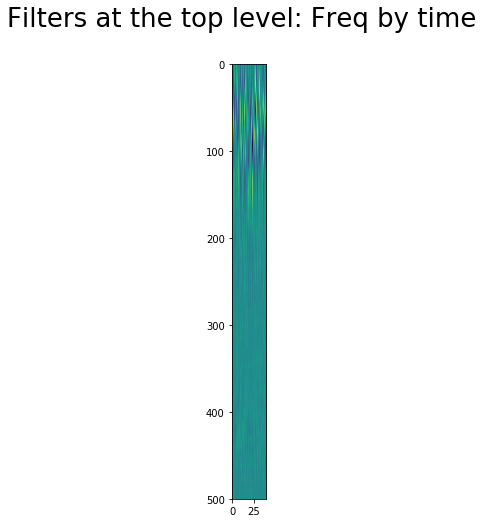

In [374]:
layer_no = 4
get_1st_conv_layer_output = K.function([model.layers[0].input],
                                  [model.layers[layer_no].output])
layer_output = get_1st_conv_layer_output([np.expand_dims(x_train[3],0)])[0]

print(layer_output.shape)
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
plt.imshow(layer_output[-1,:,:])

plt.suptitle('Filters at the top level: Freq by time', fontsize=26)